#### Bonus/Preview: Poisson's Limit

You can use the code below to see how quickly Poisson's limit becomes a good approximation.

In [1]:
from math import factorial, exp
from scipy.special import binom

In [2]:
# fix \mu, let p=\mu/n, and let n become large
# binomial(n,p) probability mass function
u = 1
# let k<n
k = 2
pmf = {}
lim = {}
for power in range(2,7+1):
    n = 2**power
    p = u/n
    # exact pmf
    pmf[n] = binom(n,k)*(p**k)*(1-p)**(n-k)
    # poisson's limit
    lim[n] = exp(-u)*u**k/factorial(k)
print(pmf)
print(lim)

{4: 0.2109375, 8: 0.19634795188903809, 16: 0.18990620290762283, 32: 0.18686724606777627, 64: 0.18538998056833395, 128: 0.18466152613394005}
{4: 0.18393972058572117, 8: 0.18393972058572117, 16: 0.18393972058572117, 32: 0.18393972058572117, 64: 0.18393972058572117, 128: 0.18393972058572117}


In [3]:
from matplotlib import pyplot as plt

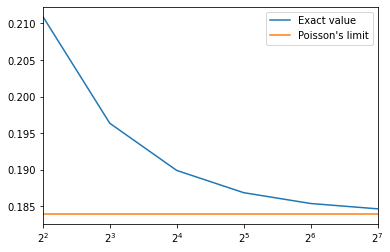

In [4]:
# clear figure
plt.clf()

# plot
plt.plot(pmf.keys(), pmf.values(), label='Exact value')
plt.plot(lim.keys(), lim.values(), label='Poisson\'s limit')

#x axis
x_min=2**2
x_max=2**7
#x_title = "Instance label, " + r"$i$"
#plt.xlabel(x_title, fontsize=12)
#plt.xticks(x,x)
plt.xscale('log', base=2)
plt.xlim(left=x_min, right=x_max)

#
plt.legend()

# show
plt.show()

### Begin actual Assignment

Every day, a number of automobiles arrive in the morning at Casey’s Auto Body Shop. Casey has room for one car in the shop and up to two on the lot. If there is no room for a car, Casey is forced to send it to his competitor, Bob’s Body Boutique. Once a car has been dropped off at Casey’s it remains there until it is repaired. It takes a whole day to repair a car, but once repaired, it is gone by the following morning.

Assume the number of autos that arrive each morning follows a Poisson($\mu$) distribution, and that the numbers on different days are independent.

The situation at Casey’s can be viewed as a five-state Markov chain, where the states are $0, 1, 2, 3, B$, where the numeric states refer to the total number of cars at Casey’s, and the state $B$ is that there are $3$ cars at Casey’s and he had to send some overflow to Bob.

### Exercise 5.1

Draw the graph corresponding to this Markov chain.

I can't think of a reasonable way of drawing a Markov chain on Jupyter (i.e. one that doesn't take too much work), so I'll just list the relevant probabilities instead.  But first, let's just write the equation that details how this stochastic process evolves through time:
\begin{gather}
X_{t+1}=\max\{0, X_t-1\} + \min\{3, X\},\\
X\sim\textrm{Poisson}(\mu). \square
\end{gather}

Now we write the probabilities:
\begin{align}
&p_{00} = P(X=0) = p_{\mu}(0)=e^{-\mu}\frac{\mu^{0}}{0!}=e^{-\mu},\\
&p_{01} = e^{-\mu}\frac{\mu^{1}}{1!} = e^{-\mu}\mu,\\
&p_{02} = e^{-\mu}\frac{\mu^{2}}{2!} = e^{-\mu}\frac{\mu^{2}}{2},\\
&p_{03} = e^{-\mu}\frac{\mu^{3}}{3!} = e^{-\mu}\frac{\mu^{3}}{6},\\
&p_{0B} = 1 - \sum_{k=0}^{3}p_{0k},
\end{align}

\begin{align}
&p_{10} = e^{-\mu}\frac{\mu^{0}}{0!}=e^{-\mu},\\
&p_{11} = e^{-\mu}\frac{\mu^{1}}{1!} = e^{-\mu}\mu,\\
&p_{12} = e^{-\mu}\frac{\mu^{2}}{2!} = e^{-\mu}\frac{\mu^{2}}{2},\\
&p_{13} = e^{-\mu}\frac{\mu^{3}}{3!} = e^{-\mu}\frac{\mu^{3}}{6},\\
&p_{1B} = 1 - \sum_{k=0}^{3}p_{1k},
\end{align}

\begin{align}
&p_{20} = 0,\\
&p_{21} = e^{-\mu}\frac{\mu^{0}}{0!}=e^{-\mu},\\
&p_{22} = e^{-\mu}\frac{\mu^{1}}{1!} = e^{-\mu}\mu,\\
&p_{23} = e^{-\mu}\frac{\mu^{2}}{2!} = e^{-\mu}\frac{\mu^{2}}{2},\\
&p_{2B} = 1 - \sum_{k=0}^{3}p_{2k},
\end{align}

\begin{align}
&p_{30} = 0,\\
&p_{31} = 0,\\
&p_{32} = e^{-\mu}\frac{\mu^{0}}{0!}=e^{-\mu},\\
&p_{33} = e^{-\mu}\frac{\mu^{1}}{1!} = e^{-\mu}\mu,\\
&p_{3B} = 1 - \sum_{k=0}^{3}p_{3k},
\end{align}

\begin{align}
&p_{B0} = 0,\\
&p_{B1} = 0,\\
&p_{B2} = e^{-\mu}\frac{\mu^{0}}{0!}=e^{-\mu},\\
&p_{B3} = e^{-\mu}\frac{\mu^{1}}{1!} = e^{-\mu}\mu,\\
&p_{BB} = 1 - \sum_{k=0}^{3}p_{Bk}.
\end{align}

### Exercise 5.2

Write down the transition matrix for this in terms of the Poisson pmf 
$p_{\mu}(k)$.

See code immediately below. $\square$

In [5]:
from math import exp, factorial

u = 0.2
P2 = {}
P2[(0,0)] = exp(-u)
P2[(0,1)] = exp(-u) * u
P2[(0,2)] = exp(-u) * u**2 / 2
P2[(0,3)] = exp(-u) * u**3 / 6
P2[(0,'B')] = 1 - (P2[(0,0)] + P2[(0,1)] + P2[(0,2)] + P2[(0,3)])

P2[(1,0)] = exp(-u)
P2[(1,1)] = exp(-u) * u
P2[(1,2)] = exp(-u) * u**2 / 2
P2[(1,3)] = exp(-u) * u**3 / 6
P2[(1,'B')] = 1 - (P2[(1,0)] + P2[(1,1)] + P2[(1,2)] + P2[(1,3)])

P2[(2,0)] = 0
P2[(2,1)] = exp(-u)
P2[(2,2)] = exp(-u) * u
P2[(2,3)] = exp(-u) * u**2 / 2
P2[(2,'B')] = 1 - (P2[(2,0)] + P2[(2,1)] + P2[(2,2)] + P2[(2,3)])

P2[(3,0)] = 0
P2[(3,1)] = 0
P2[(3,2)] = exp(-u)
P2[(3,3)] = exp(-u) * u
P2[(3,'B')] = 1 - (P2[(3,0)] + P2[(3,1)] + P2[(3,2)] + P2[(3,3)])

P2[('B',0)] = 0
P2[('B',1)] = 0
P2[('B',2)] = exp(-u)
P2[('B',3)] = exp(-u) * u
P2[('B','B')] = 1 - (P2[('B',0)] + P2[('B',1)] + P2[('B',2)] + P2[('B',3)])

In [6]:
u = 1.5
P15 = {}
P15[(0,0)] = exp(-u)
P15[(0,1)] = exp(-u) * u
P15[(0,2)] = exp(-u) * u**2 / 2
P15[(0,3)] = exp(-u) * u**3 / 6
P15[(0,'B')] = 1 - (P15[(0,0)] + P15[(0,1)] + P15[(0,2)] + P15[(0,3)])

P15[(1,0)] = exp(-u)
P15[(1,1)] = exp(-u) * u
P15[(1,2)] = exp(-u) * u**2 / 2
P15[(1,3)] = exp(-u) * u**3 / 6
P15[(1,'B')] = 1 - (P15[(1,0)] + P15[(1,1)] + P15[(1,2)] + P15[(1,3)])

P15[(2,0)] = 0
P15[(2,1)] = exp(-u)
P15[(2,2)] = exp(-u) * u
P15[(2,3)] = exp(-u) * u**2 / 2
P15[(2,'B')] = 1 - (P15[(2,0)] + P15[(2,1)] + P15[(2,2)] + P15[(2,3)])

P15[(3,0)] = 0
P15[(3,1)] = 0
P15[(3,2)] = exp(-u)
P15[(3,3)] = exp(-u) * u
P15[(3,'B')] = 1 - (P15[(3,0)] + P15[(3,1)] + P15[(3,2)] + P15[(3,3)])

P15[('B',0)] = 0
P15[('B',1)] = 0
P15[('B',2)] = exp(-u)
P15[('B',3)] = exp(-u) * u
P15[('B','B')] = 1 - (P15[('B',0)] + P15[('B',1)] + P15[('B',2)] + P15[('B',3)])

### Exercise 5.3

For $\mu = 0.2$ and $\mu = 1.5$, write down the numeric transition matrix.

See code immediately below. $\square$

In [7]:
import numpy as np

In [8]:
temp = []
for i in [0,1,2,3,'B']:
    temp.append([P2[(i,j)] for j in [0,1,2,3,'B']])
mat2 = np.array(temp)
print("For u=0.2,\nmat={0}".format(mat2))

For u=0.2,
mat=[[8.18730753e-01 1.63746151e-01 1.63746151e-02 1.09164100e-03
  5.68402408e-05]
 [8.18730753e-01 1.63746151e-01 1.63746151e-02 1.09164100e-03
  5.68402408e-05]
 [0.00000000e+00 8.18730753e-01 1.63746151e-01 1.63746151e-02
  1.14848124e-03]
 [0.00000000e+00 0.00000000e+00 8.18730753e-01 1.63746151e-01
  1.75230963e-02]
 [0.00000000e+00 0.00000000e+00 8.18730753e-01 1.63746151e-01
  1.75230963e-02]]


In [9]:
temp = []
for i in [0,1,2,3,'B']:
    temp.append([P15[(i,j)] for j in [0,1,2,3,'B']])
mat15 = np.array(temp)
print("For u=1.5,\nmat={0}".format(mat15))

For u=1.5,
mat=[[0.22313016 0.33469524 0.25102143 0.12551072 0.06564245]
 [0.22313016 0.33469524 0.25102143 0.12551072 0.06564245]
 [0.         0.22313016 0.33469524 0.25102143 0.19115317]
 [0.         0.         0.22313016 0.33469524 0.4421746 ]
 [0.         0.         0.22313016 0.33469524 0.4421746 ]]


### Exercise 5.4

Today, Casey has no cars. For $\mu = 0.2$ and $\mu = 1.5$, what is the numeric probability of each state in 30 days.

See code below. $\square$

In [10]:
num_days = 30
new_mat2 = np.linalg.matrix_power(mat2, num_days)
old_dist = np.array([1,0,0,0,0])
new_dist2 = np.matmul(old_dist, new_mat2)
print("For u=0.2, the probability distribution is:")
print(new_dist2)
#print(sum(new_dist2))

For u=0.2, the probability distribution is:
[8.00117152e-01 1.77148144e-01 2.09161728e-02 1.70709454e-03
 1.11436115e-04]


In [11]:
num_days = 30
new_mat15 = np.linalg.matrix_power(mat15, num_days)
#print(new_mat15)
old_dist = np.array([1,0,0,0,0])
new_dist15 = np.matmul(old_dist, new_mat15)
print("For u=1.5, the probability distribution is:")
print(new_dist15)
#print(sum(new_dist15))

For u=1.5, the probability distribution is:
[0.02873365 0.1000416  0.25519243 0.28640452 0.3296278 ]


### Exercise 5.5

For $\mu = 0.2$ and $\mu = 1.5$, numerically find the steady-state (invariant) distribution of the Markov chain.

See code below.  The invariant distributions are the last distributions printed out in each cell.  Note that you can change the initial distribution and this will not change.  This is expected, according to Theorem 15.6.1. $\square$

In [12]:
# The invariant
for p in range(1,5+1):
    num_days = 2**p
    new_mat2 = np.linalg.matrix_power(mat2, num_days)
    old_dist = np.array([1,0,0,0,0])
    new_dist2 = np.matmul(old_dist, new_mat2)
    print("For u=0.2, the probability distribution after {0} days is:".format(num_days))
    print(new_dist2)
    #print(sum(new_dist2))

For u=0.2, the probability distribution after 2 days is:
[8.04384055e-01 1.74283212e-01 1.97092582e-02 1.52869947e-03
 9.47751095e-05]
For u=0.2, the probability distribution after 4 days is:
[8.00435856e-01 1.76938127e-01 2.08228498e-02 1.69305524e-03
 1.10112269e-04]
For u=0.2, the probability distribution after 8 days is:
[8.00119095e-01 1.77146865e-01 2.09156032e-02 1.70700881e-03
 1.11428028e-04]
For u=0.2, the probability distribution after 16 days is:
[8.00117152e-01 1.77148144e-01 2.09161728e-02 1.70709454e-03
 1.11436114e-04]
For u=0.2, the probability distribution after 32 days is:
[8.00117152e-01 1.77148144e-01 2.09161728e-02 1.70709454e-03
 1.11436115e-04]


In [13]:
# The invariant
for p in range(1,5+1):
    num_days = 2**p
    new_mat15 = np.linalg.matrix_power(mat15, num_days)
    old_dist = np.array([1,0,0,0,0])
    new_dist15 = np.matmul(old_dist, new_mat15)
    print("For u=1.5, the probability distribution after {0} days is:".format(num_days))
    print(new_dist15)
    #print(sum(new_dist2))

For u=1.5, the probability distribution after 2 days is:
[0.12446767 0.24271196 0.26669384 0.19700288 0.16912365]
For u=1.5, the probability distribution after 4 days is:
[0.0589799  0.14718097 0.25985821 0.25738492 0.27659601]
For u=1.5, the probability distribution after 8 days is:
[0.03195377 0.10506711 0.25569261 0.28331241 0.3239741 ]
For u=1.5, the probability distribution after 16 days is:
[0.02877021 0.10009865 0.25519811 0.28636942 0.32956361]
For u=1.5, the probability distribution after 32 days is:
[0.02873364 0.10004158 0.25519243 0.28640453 0.32962782]


### Exercise 5.6

For $\mu = 0.2$ and $\mu = 1.5$, what is the steady-state probability that Casey will send Bob some customers on April 1. (Hint: It’s the probability of state B under the invariant distribution.)

See code above.  The probability that Casey sends Bob some customers on April 1 is $\approx1.11\times10^{-4}$ if $\mu=0.2$, and $\approx0.33$ if $\mu=1.5$. $\square$

### Note to self.  The above seems intuitively correct, but maybe I could empirically check by running a more primitive simulation at some point.